# CAR PRICE PREDICTION SYSTEM

### Made by Nirut Gammayeengoen, st123472

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, matplotlib.__version__, sns.__version__

('1.25.2', '1.5.3', '3.7.2', '0.12.2')

## 1. Load data

In [3]:
# Load the csv file
df = pd.read_csv('../Data/Cars.csv')

In [4]:
# Check 5 first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of data
df.shape

(8128, 13)

In [6]:
# Check Statistical information
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Check Dtypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# Check column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

### Renaming

Now I would like to rename some of the following column names, it easy to write the code.

In [9]:
# Rename column
df.rename(columns={'name': 'brand',
                   }, inplace=True)

In [10]:
# Notice that column name changed
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### 2.1 Univariate analysis

Single variable exploratory data analysis
### Countplot

<Axes: xlabel='seller_type', ylabel='count'>

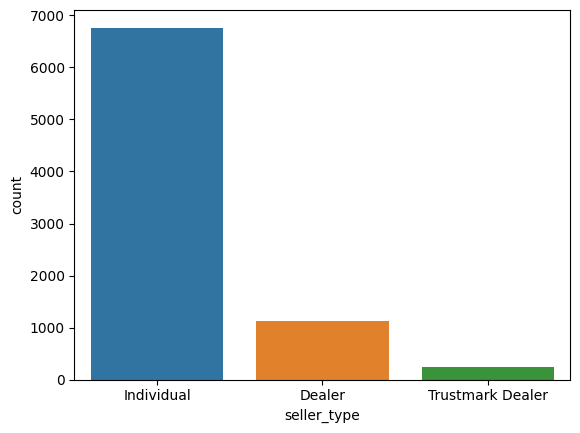

In [11]:
# Let's see how many seller_type there are
sns.countplot(data=df, x='seller_type')

<Axes: xlabel='owner', ylabel='count'>

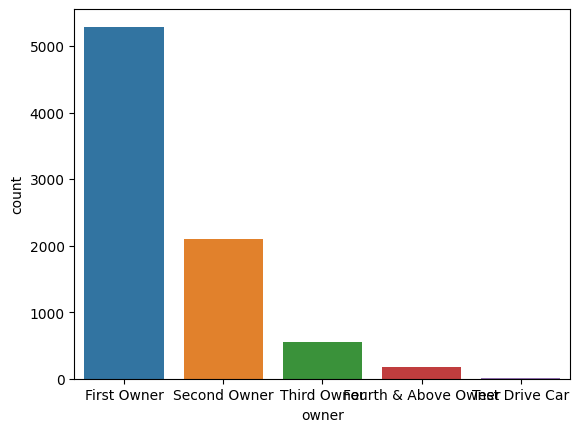

In [12]:
# Let's see how many owner type there are
sns.countplot(data=df, x='owner')

### Distribution plot

/home/nirut/Practice/Machine_Learning/Nirut_Sandbox/Coding_Assignment/Coding Assignment 1/CarPrice_Prediction_WebApp-VenvVersion/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


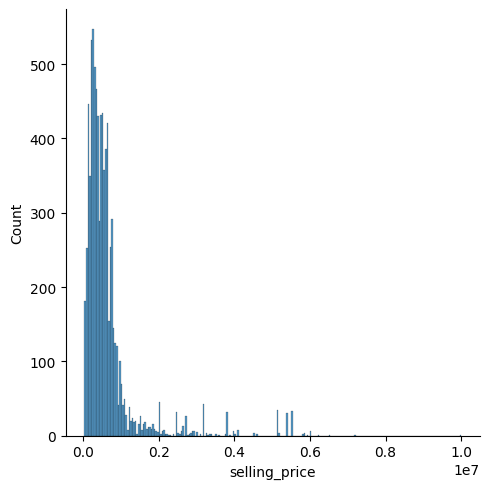

In [13]:
# Let's see distribution of selling_price
sns.displot(data=df, x='selling_price')

Selling price mostly show in area of near 1 million.

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis
### Boxplot

Text(0.5, 0, 'Seller Type')

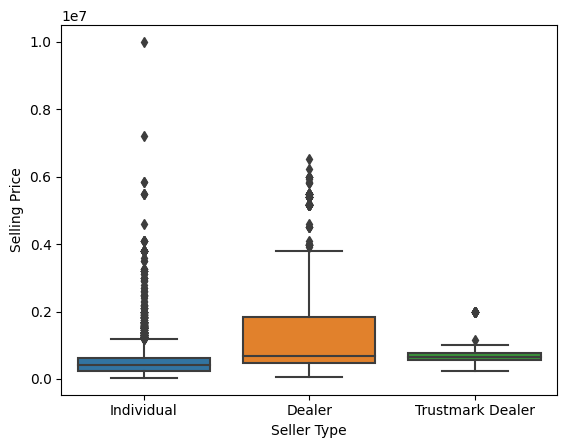

In [14]:
# Let's try bar plot on "seller_type"
sns.boxplot(x=df['seller_type'], y=df['selling_price'])
plt.ylabel('Selling Price')
plt.xlabel('Seller Type')

Text(0.5, 0, 'Owner')

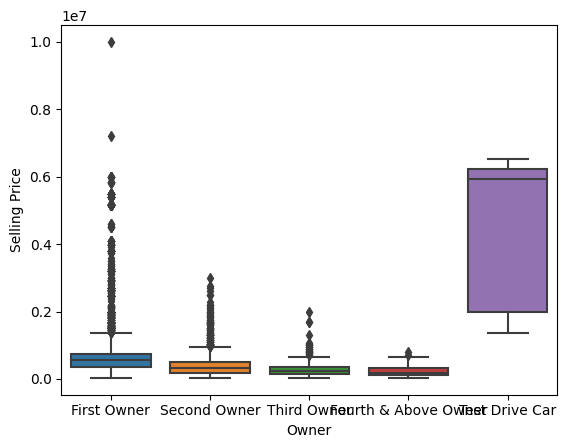

In [15]:
# Let's try bar plot on "owner"
sns.boxplot(x=df['owner'], y=df['selling_price'])
plt.ylabel('Selling Price')
plt.xlabel('Owner')

### Found out that 'Test Drive Car' are ridiculously expensive, I will delete all samples related to it.

In [16]:
# Check the shape of data before delete related samples
df.shape

(8128, 13)

In [17]:
df = df[df['owner'] != 'Test Drive Car']

In [18]:
# Check the shape of data after deleted related samples
df.shape

(8123, 13)

### Scatterplot

<Axes: xlabel='year', ylabel='selling_price'>

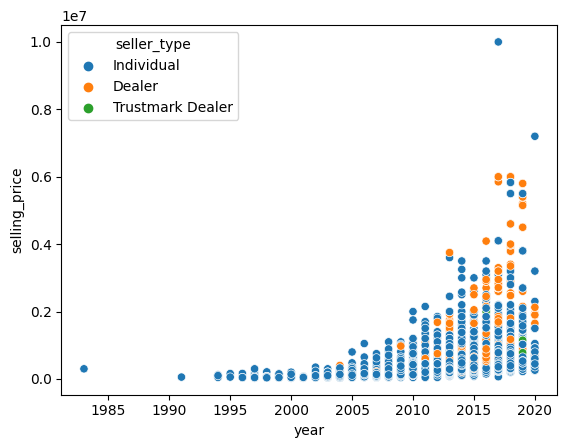

In [19]:
sns.scatterplot(x=df['year'], y=df['selling_price'], hue=df['seller_type'])

<Axes: xlabel='km_driven', ylabel='selling_price'>

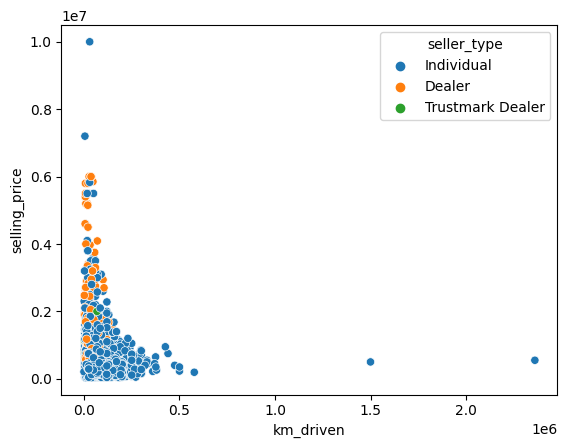

In [20]:
sns.scatterplot(x=df['km_driven'], y=df['selling_price'], hue=df['seller_type'])

<Axes: xlabel='mileage', ylabel='selling_price'>

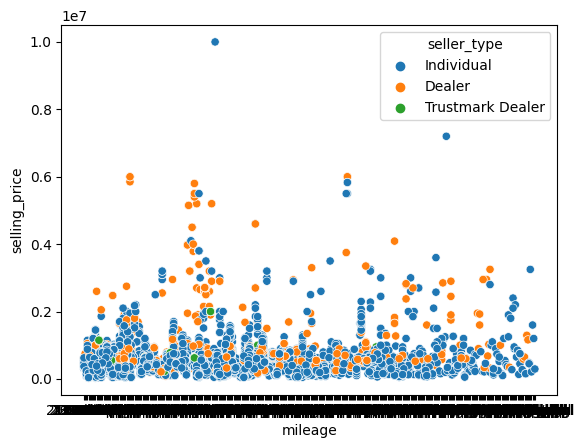

In [21]:
sns.scatterplot(x=df['mileage'], y=df['selling_price'], hue=df['seller_type'])

### Feature: owner, map
- 'First Owner' = 1,
- 'Second Owner' = 2,
- 'Third Owner' = 3,
- 'Forth & Above Owner' = 4

In [22]:
mapping_dict = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Forth & Above Owner': 4
}

df['owner'] = df['owner'].map(mapping_dict)

In [23]:
# Check data in owner after map have to show as number display
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1.0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3.0,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1.0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1.0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Feature: fuel, remove all row of
- 'CNG',
- 'LPG'
### because 'CNG' and 'LPG' use a different mileage system i.e., km/kg which is differenct from kmfeaturepl for Diesel and Petrol

In [24]:
# Check the shape of data before delete related rows
df.shape

(8123, 13)

In [25]:
df = df[df['fuel'] != 'CNG']
df = df[df['fuel'] != 'LPG']

In [26]:
# Check the shape of data after deleted related samples
df.shape

(8028, 13)

### Feature: mileage,
- Remove 'kmpl', and 
- convert column to float

In [27]:
df['mileage'] = df['mileage'].str.split().str.get(0)
df['mileage'] = df['mileage'].astype(float)

In [28]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1.0,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3.0,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1.0,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1.0,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Feature: engine,
- Remove 'CC', and 
- convert column to float

In [29]:
df['engine'] = df['engine'].str.split().str.get(0)
df['engine'] = df['engine'].astype(float)

In [30]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1.0,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3.0,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1.0,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1.0,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Feature: max_power,
- Remove 'bhp', and 
- convert column to float

In [31]:
df['max_power'] = df['max_power'].str.split().str.get(0)
df['max_power'] = df['max_power'].astype(float)

In [32]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1.0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3.0,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1.0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1.0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


### Feature: brand,
- Take only the first word and remove the rest

In [33]:
df['brand'] = df['brand'].str.split().str.get(0)

In [34]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1.0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3.0,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1.0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1.0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


### Feature: torqe,
- Drop for simply

In [35]:
df.drop(columns=['torque'], inplace=True)

In [36]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1.0,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3.0,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1.0,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1.0,16.10,1298.0,88.20,5.0


### Label: selling_price,
- first transform the label by log transform to solve about big number unstable.

In [37]:
y = np.log(df['selling_price'])

In [38]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1.0,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3.0,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1.0,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1.0,16.10,1298.0,88.20,5.0


### Change some columns to numbers by LabelEncoder

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])


df['brand'].unique()
df['fuel'].unique()
df['seller_type'].unique()
df['transmission'].unique()

array([1, 0])

In [40]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1.0,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,1,1,2.0,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,1,1,3.0,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,1,1,1.0,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,1,1,1.0,16.10,1298.0,88.20,5.0


### Correlation Matrix

Use correlation matrix to find strong factors predicting the selling price, and also for checking whether certain features are too correlated.

<Axes: >

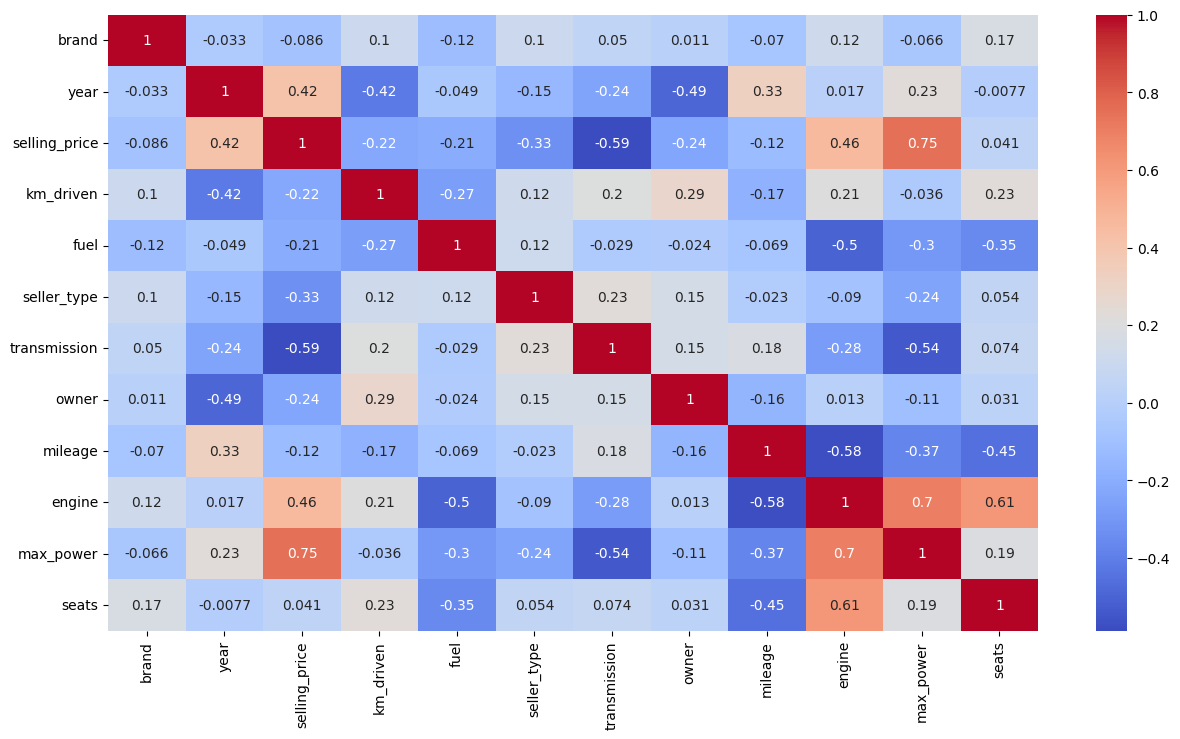

In [41]:
# Check out heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Predictive Power Score

Check the predictive power of some feature. Unlike correlation, `pps` actually obtained from actual prediction.

<Axes: xlabel='x', ylabel='y'>

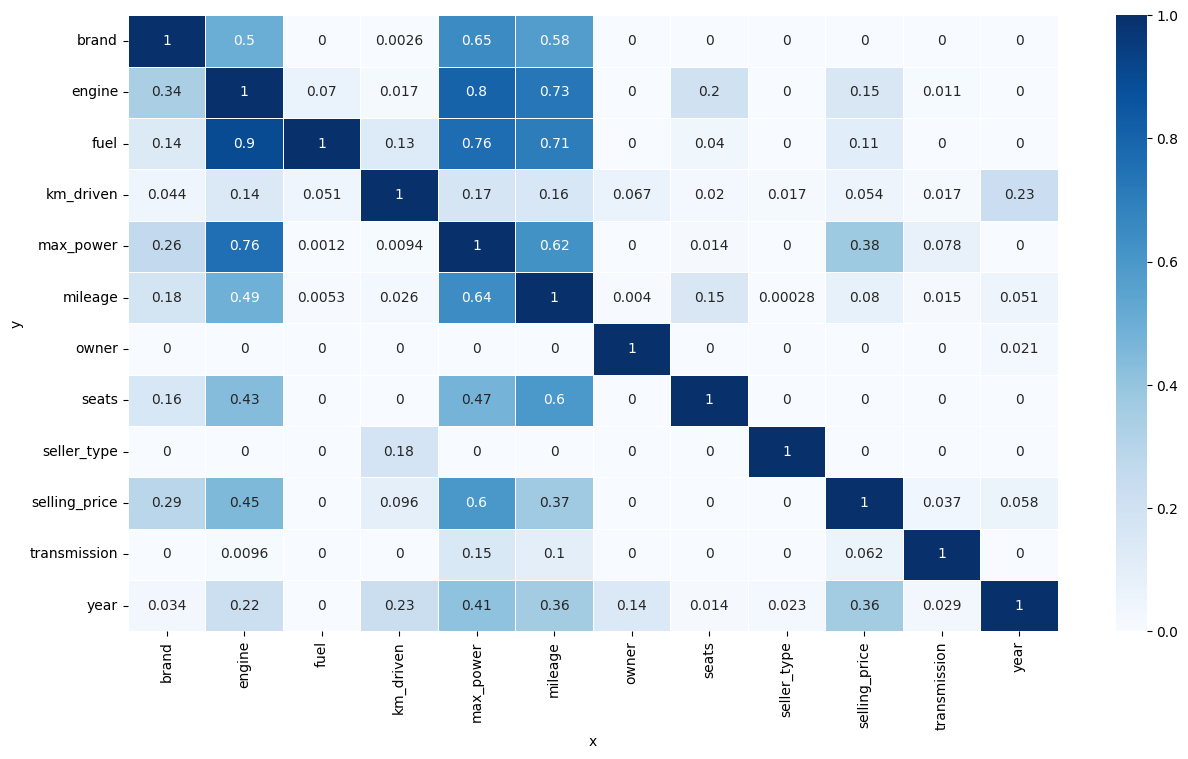

In [42]:
import ppscore as pps

# this needs some minor preprocessing because seaborn.heatmp unfortuately does not accept tidy data
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap='Blues', linewidths=0.5, annot=True)

## 3. Feature engineering

In [43]:
# Skip

## 4. Feature selection

In [44]:
# x is strong features
X = df[['year', 'km_driven','max_power']]

# y is simply the selling_price col
y = df['selling_price']

### Train/Test Split

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Preprocessing

### Null values

In [46]:
# Check for null values in X_train
X_train[['year', 'km_driven', 'max_power']].isna().sum()

year           0
km_driven      0
max_power    149
dtype: int64

In [47]:
# Check for null values in X_test
X_test[['year', 'km_driven', 'max_power']].isna().sum()

year          0
km_driven     0
max_power    59
dtype: int64

In [48]:
# Check for null values in y_train
y_train.isna().sum()

0

In [49]:
# Check for null values in y_test
y_test.isna().sum()

0

/home/nirut/Practice/Machine_Learning/Nirut_Sandbox/Coding_Assignment/Coding Assignment 1/CarPrice_Prediction_WebApp-VenvVersion/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


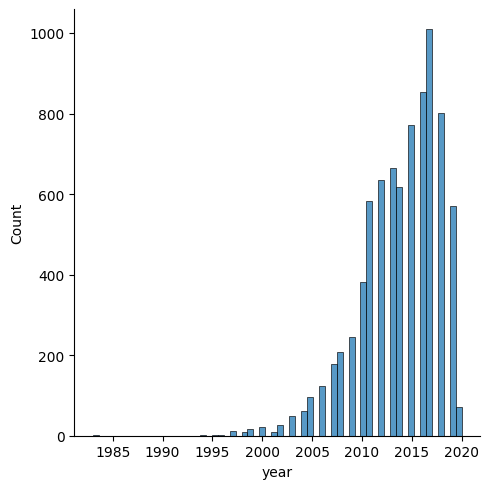

In [50]:
# Check distribution of year
sns.displot(data=df, x='year')

/home/nirut/Practice/Machine_Learning/Nirut_Sandbox/Coding_Assignment/Coding Assignment 1/CarPrice_Prediction_WebApp-VenvVersion/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


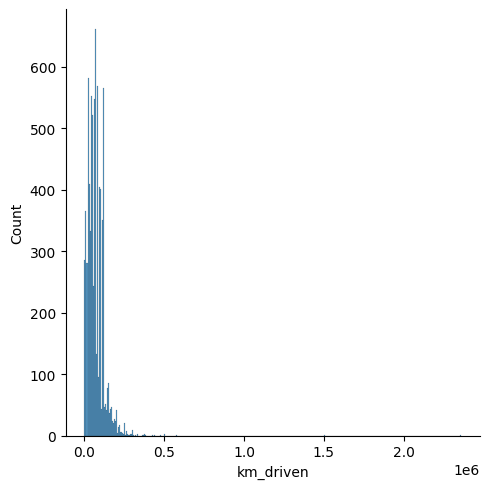

In [51]:
# Check distribution of km_driven
sns.displot(data=df, x='km_driven')

/home/nirut/Practice/Machine_Learning/Nirut_Sandbox/Coding_Assignment/Coding Assignment 1/CarPrice_Prediction_WebApp-VenvVersion/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


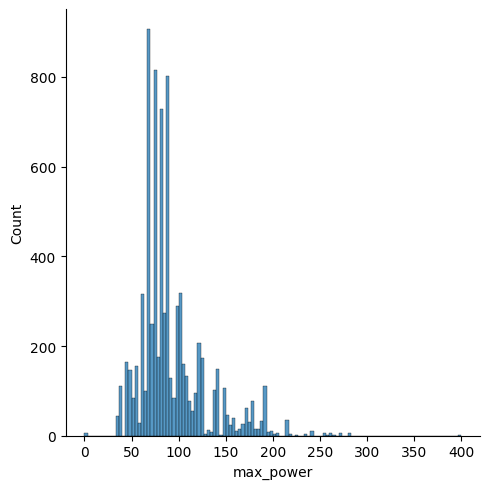

In [52]:
# Check distribution of max_power
sns.displot(data=df, x='max_power')

/home/nirut/Practice/Machine_Learning/Nirut_Sandbox/Coding_Assignment/Coding Assignment 1/CarPrice_Prediction_WebApp-VenvVersion/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


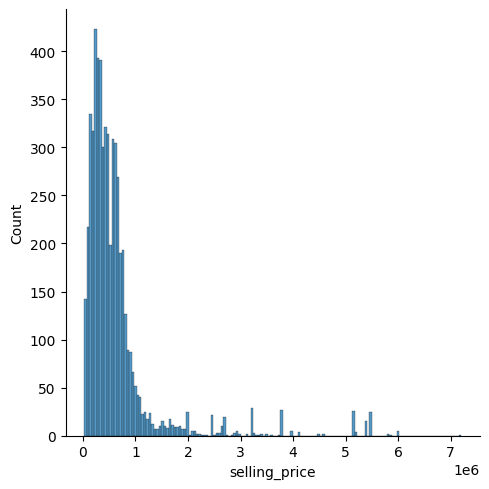

In [53]:
# Check distribution of y_train
sns.displot(y_train)

### Imputing missing values

- from data distribution on graphs above, I would like to fill with median.

In [54]:
# From check null values in X_train, X_test, y_train, y_test above, 
# I have to fill X_train['max_power] and X_test['max_power],
# For y_train and y_test no null values, no need to fill with median.

X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)

In [55]:
# Check missing values again for X_train
X_train[['year', 'km_driven', 'max_power']].isna().sum()

year         0
km_driven    0
max_power    0
dtype: int64

In [56]:
# Check missing values again for X_test
X_test[['year', 'km_driven', 'max_power']].isna().sum()

year         0
km_driven    0
max_power    0
dtype: int64

In [57]:
# Check missing values again for y_train
y_train.isna().sum()

0

In [58]:
# Check missing values again for y_test
y_test.isna().sum()

0

### Check Outliers

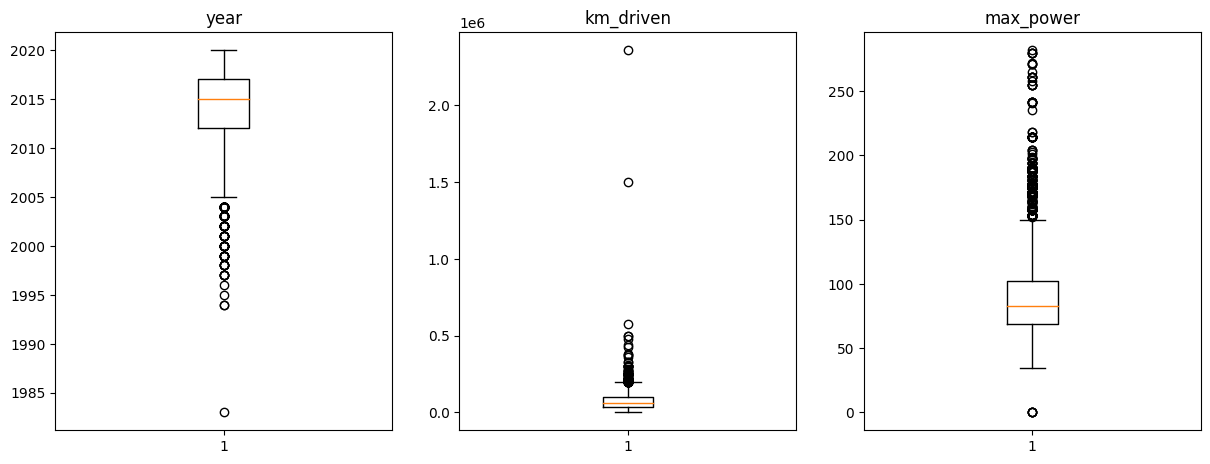

In [59]:
# Create a dictionary of columns.
col_dict = {'year': 1, 'km_driven': 2, 'max_power': 3}

# Detect outliers in each variables using box plots.
plt.figure(figsize=(20, 30))

for variable, i in col_dict.items():
    plt.subplot(5, 4, i)
    plt.boxplot(X_train[variable])
    plt.title(variable)

plt.show()

In [60]:
# Create the outlier_count function

def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [61]:
# Call the outlier_count function to use with X_train

for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%

---------------km_driven---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%


### Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 

In [63]:
# Check shapes of all X_train, X_test, y_train, y_test

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test :  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test :  (2409,)


## 6. Modeling

Let's define some algorithms and compare them using cross-validation.

[Scikit-Learn](http://scikit-learn.org) provides quick access to a huge pool of machine learning algorithms.

To apply majority of the algorithms, sklearn requires two inputs, i.e., $\mathbf{X}$ and $\mathbf{y}$.

-  $\mathbf{X}$, or the **feature matrix** *typically* has the shape of ``[n_samples, n_features]``
-  $\mathbf{y}$, or the **target/label vector** *typically* has the shape of ``[n_samples, ]`` or ``[n_samples, n_targets]`` depending whether that algorithm supports multiple labels

Note 1:  if $\mathbf{X}$ has only 1 feature, the shape must be ``[n_samples, 1]`` NOT ``[n_samples, ]``

Note 2:  sklearn supports both numpy and pandas, as long as the shape is right.  For example, if you use pandas, $\mathbf{X}$ would be a dataframe, and $\mathbf{y}$ could be a series or dataframe.

In [64]:
from sklearn.linear_model import LinearRegression # I am using regression model
from sklearn.metrics import mean_squared_error, r2_score # For using MSE and r2

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print('MSE: ', mean_squared_error(y_test, yhat))
print('r2 : ', r2_score(y_test, yhat))

MSE:  241311346436.11514
r2 :  0.6389024995767429


### Cross validation + Grid search

In [65]:
from sklearn.linear_model import LinearRegression # I am using regression model
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Put models in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state=0),
              RandomForestRegressor(n_estimators=100, random_state=0)]

# The names of the models
algorithm_names = ['Linear Regression', 'SVR', 'KNeighbors Regressor', 'Decision-Tree Regressor', 'Random-Forest Regressor']

In [66]:
y_train.isna().sum()

0

In [67]:
from sklearn.model_selection import KFold, cross_val_score

# Lists for keeping mse
train_mse = []
test_mse  = []

# Defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f'{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}')

Linear Regression - Score: [-2.27009451e+11 -2.64869889e+11 -1.91455406e+11 -2.46067071e+11
 -2.50173232e+11]; Mean: -235915009997.1599
SVR - Score: [-6.27245864e+11 -8.15827120e+11 -7.11271107e+11 -5.54526093e+11
 -6.40411040e+11]; Mean: -669856244763.9451
KNeighbors Regressor - Score: [-4.82500604e+10 -2.59214083e+10 -4.41176341e+10 -4.45400227e+10
 -3.71973049e+10]; Mean: -40005286064.67484
Decision-Tree Regressor - Score: [-3.14339203e+10 -5.34660350e+10 -4.19826670e+10 -4.44301683e+10
 -3.23184319e+10]; Mean: -40726244486.31178
Random-Forest Regressor - Score: [-2.66428233e+10 -3.92812000e+10 -2.04637631e+10 -4.10041216e+10
 -2.13333899e+10]; Mean: -29745059588.774456


### Grid Search

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state=1)

grid = GridSearchCV(estimator = rf,
                    param_grid = param_grid,
                    cv = kfold,
                    n_jobs = -1,
                    return_train_score = True,
                    refit = True,
                    scoring = 'neg_mean_squared_error')

# Fit grid_search
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [70]:
# Find grid_search's best score
best_mse = grid.best_score_

In [71]:
best_mse

-29073429358.808308

## 7. Testing

In [72]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

38879498003.56567

## 8. Analysis

### Algorithm way

In [73]:
# Grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.20840567, 0.03429826, 0.75729607])

<BarContainer object of 3 artists>

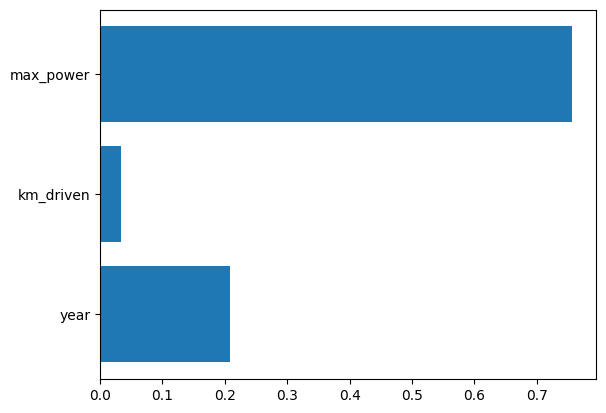

In [74]:
# Plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

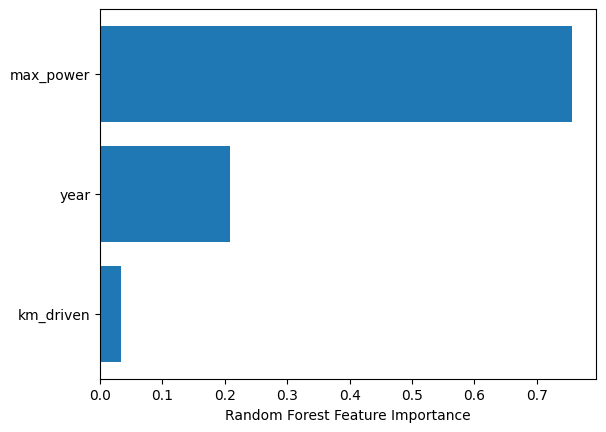

In [75]:
# Sort
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')

#### Permutation way

This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

*Note*: The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

Text(0.5, 0, 'Random Forest Feature Importance')

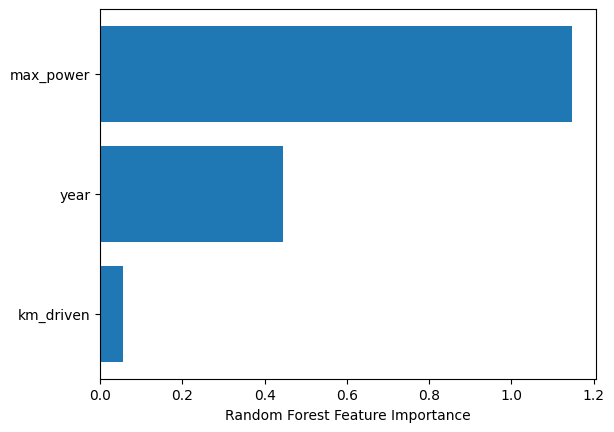

In [76]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

# Plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Random Forest Feature Importance')

## 9. Inference

In [77]:
import pickle

# Save the model to disk
filename = '../Model/A1_Predicting_Car_Price.model'
pickle.dump(grid, open(filename, 'wb'))

In [78]:
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [79]:
# Try inference 2 samples
inference_sample1 = np.array([[-0.71572536, -0.58207856, -0.05063609]])
inference_sample2 = np.array([[ 0.53463554,  0.66416893,  0.97141605]])


In [80]:
# Try to use inference sample 1 to predict
predicted_selling_price_by_inference_sample1 = loaded_model.predict(inference_sample1)
predicted_selling_price_by_inference_sample1

array([277266.66666667])

In [81]:
# Try to use inference sample 2 to predict
predicted_selling_price_by_inference_sample2 = loaded_model.predict(inference_sample2)
predicted_selling_price_by_inference_sample2

array([923333.33333333])

## 10. Deployment

In [82]:
# Do with Django

# Report

After I do this notebook, I can summarize as below.

Important Features consist of 
- max_power,
- year,
- km_driven